<a href="https://colab.research.google.com/github/Nneka/MachineLearning/blob/main/01_isitaburger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.9 MB/s eta 0:00:00


In [2]:
from collections import UserList
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
    # generator which yields dicts with:
        # {'title','image','thumbnail','url','height','width','source'}
        search_results = ddgs.images(keywords=term)
        # grap number of max_images urls
        image_urls = [next(search_results).get("image") for _ in range(max_images)]
        # convert to L (functionally extended list class from fastai)
        return L(image_urls)

# Searching for hamburgers and printing the URLs
urls = search_images("hamburgers", max_images=10)
# for x in urls:
#  print(x)
print(urls[0])

Searching for 'hamburgers'


<ipython-input-2-2f55eaef4d9f>:7: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:


https://cmx.weightwatchers.com/assets-proxy/weight-watchers/image/upload/v1594406683/visitor-site/prod/ca/burgers_mobile_my18jv


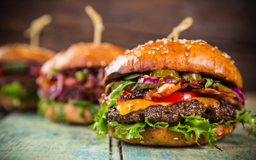

In [40]:
from fastdownload import download_url
dest = 'burger.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'flowers photos'


<ipython-input-39-2f55eaef4d9f>:7: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:


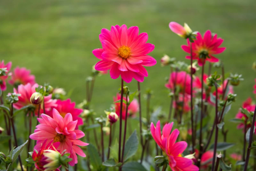

In [41]:
from fastdownload import download_url
urls1 = search_images("flowers photos", max_images=1)
dest = 'flowers.jpg'
download_url(urls1[0], dest, show_progress=False)

from fastai.vision.all import *
Image.open(dest).to_thumb(256,256)



**Note**
In the code snippet provided in the "is it a bird", the following code snippet was provided.



```
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)
```



In [42]:
searches = 'flower', 'hamburger'
path = Path('hamburger_or_not')
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photo'))
  sleep(10) #Pause between searches to avoid over-loading server
  download_images(dest, urls=search_images(f'{o} outside photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} inside photo'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)

Searching for 'flower photo'


<ipython-input-39-2f55eaef4d9f>:7: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:


Searching for 'flower outside photo'
Searching for 'flower inside photo'
Searching for 'hamburger photo'
Searching for 'hamburger outside photo'
Searching for 'hamburger inside photo'


In [43]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

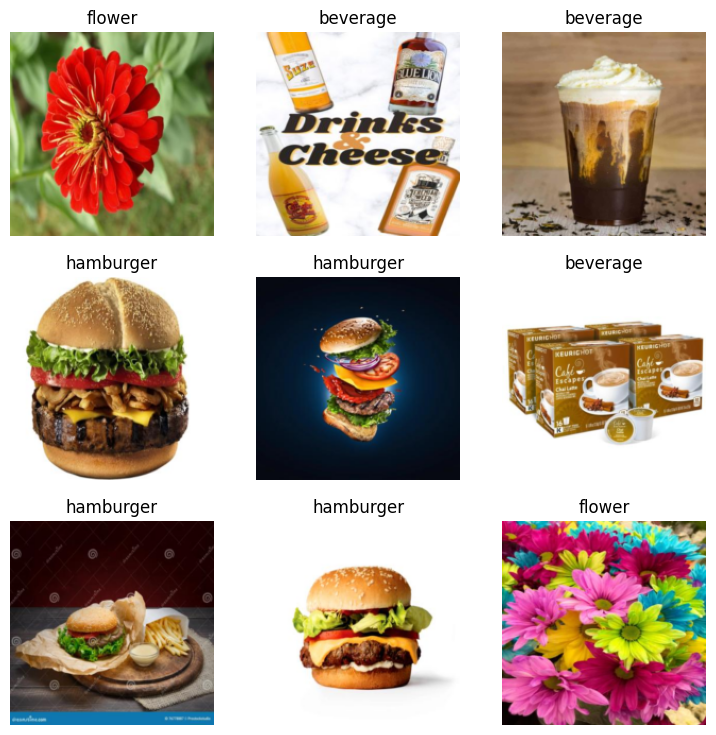

In [44]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=9)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
is_burger,_,probs = learn.predict(PILImage.create('burger.jpg'))
print(f"This is a: {is_burger}.")
print(f"Probability it's a hamburger: {probs[0]:.4f}")